# **Importing Libraries**

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,accuracy_score

# **Importing Dataset**

In [122]:
df = pd.read_csv("/content/drive/MyDrive/DST_project_1/Training Data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/DST_project_1/Testing Data.csv")

In [123]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [124]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# **Data Cleaning**

In [126]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [127]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [128]:
df[df['Loan_Status']== 'Y']['Gender'].value_counts()

Male      339
Female     75
Name: Gender, dtype: int64

In [129]:
df[df['Loan_Status']== 'N']['Gender'].value_counts()

Male      150
Female     37
Name: Gender, dtype: int64

In [130]:
df[df['Gender'].isnull()]['Loan_Status'].value_counts()

Y    8
N    5
Name: Loan_Status, dtype: int64

In [131]:
df.Gender.fillna('Male', inplace=True)
test_data.Gender.fillna('Male', inplace=True)

In [132]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [133]:
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [135]:
df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [136]:
df.Married.isnull().value_counts()

False    611
True       3
Name: Married, dtype: int64

In [137]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [138]:
df[df['Married']=='Yes']['Gender'].value_counts()

Male      367
Female     31
Name: Gender, dtype: int64

In [139]:
df[df['Married']=='No']['Gender'].value_counts()

Male      133
Female     80
Name: Gender, dtype: int64

In [140]:
df['Married'].fillna('Yes', inplace = True)
test_data['Married'].fillna('Yes', inplace = True)

In [141]:
df.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [143]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [144]:
df.Dependents.isnull().sum()

15

In [145]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [146]:
df[df['Married']=='Yes']['Dependents'].value_counts()

0     174
2      93
1      79
3+     44
Name: Dependents, dtype: int64

In [147]:
df.Dependents.fillna('0',inplace=True)
test_data.Dependents.fillna('0',inplace=True)

In [148]:
df.Dependents.isnull().sum()

0

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [150]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [151]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [152]:
df.Self_Employed.isnull().sum()

32

In [153]:
df[df['Self_Employed'].isnull()]['Credit_History'].value_counts()

1.0    25
0.0     1
Name: Credit_History, dtype: int64

In [154]:
df['Self_Employed'].fillna('No',inplace=True)
test_data['Self_Employed'].fillna('No',inplace=True)

In [155]:
df.Self_Employed.isnull().sum()

0

In [156]:
df.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [157]:
df.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [158]:
df.LoanAmount.isnull().sum()

22

In [159]:
df.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [160]:
df.iloc[:,8:10].isnull().value_counts()

LoanAmount  Loan_Amount_Term
False       False               578
True        False                22
False       True                 14
dtype: int64

In [161]:
df.LoanAmount.fillna(0,inplace=True)
test_data.LoanAmount.fillna(0,inplace=True)

In [162]:
df.LoanAmount.isnull().sum()

0

In [163]:
df.LoanAmount.describe()

count    614.000000
mean     141.166124
std       88.340630
min        0.000000
25%       98.000000
50%      125.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [164]:
df.iloc[:,9].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [165]:
df.Loan_Amount_Term.isnull().sum()

14

In [166]:
df[df['LoanAmount']== 0 ]['Loan_Amount_Term'].isnull().sum()

0

In [167]:
df.Loan_Amount_Term.median()

360.0

In [168]:
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median(),inplace=True)
test_data.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median(),inplace=True)

In [169]:
df.Loan_Amount_Term.isnull().sum()

0

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [171]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [172]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [173]:
df[df['Loan_Status']=='Y']['Credit_History'].value_counts()

1.0    378
0.0      7
Name: Credit_History, dtype: int64

In [174]:
df[df['Loan_Status']=='N']['Credit_History'].value_counts()

1.0    97
0.0    82
Name: Credit_History, dtype: int64

In [175]:
df[df['Loan_Status']=='Y']['Credit_History'].isnull().sum()

37

In [176]:
df[df['Loan_Status']=='N']['Credit_History'].isnull().sum()

13

In [177]:
df.Credit_History.fillna(1,inplace=True)
test_data.Credit_History.fillna(1,inplace=True)

In [178]:
df.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [180]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [181]:
df.drop('Loan_ID',axis=1,inplace=True)

In [182]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [184]:
df['Total_Income'] = df.ApplicantIncome + df.CoapplicantIncome
test_data['Total_Income'] = test_data.ApplicantIncome + test_data.CoapplicantIncome

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  Total_Income       614 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [186]:
df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)
test_data.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    object 
 1   Married           614 non-null    object 
 2   Dependents        614 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     614 non-null    object 
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    float64
 8   Property_Area     614 non-null    object 
 9   Loan_Status       614 non-null    object 
 10  Total_Income      614 non-null    float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


#**Data** **Visualization**

1. What's the ratio of Male to Female?

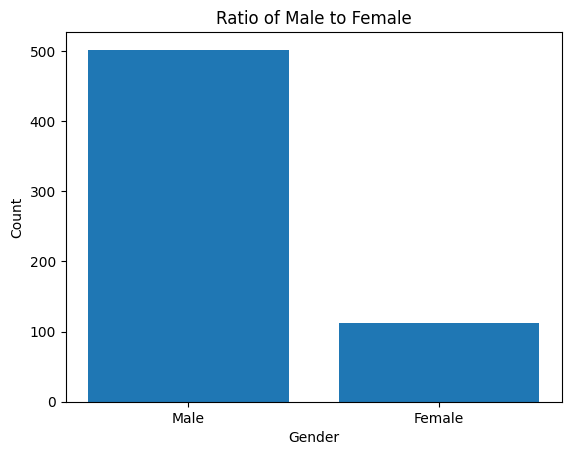

In [188]:
plt.bar(('Male','Female'),df.Gender.value_counts())
plt.title('Ratio of Male to Female')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

2. How many Males are married and non-married?

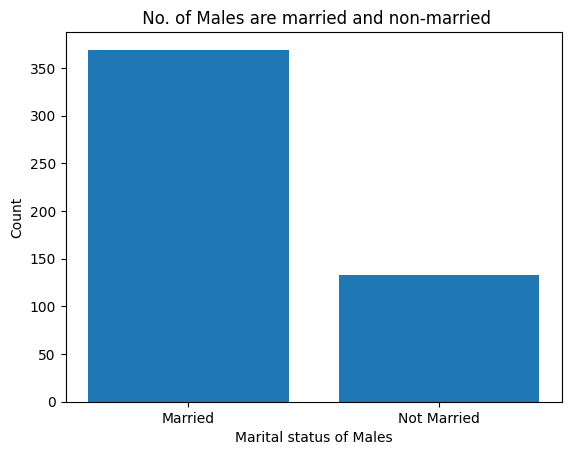

In [189]:
plt.bar(('Married','Not Married'),df[df['Gender']=='Male']['Married'].value_counts())
plt.title(' No. of Males are married and non-married')
plt.xlabel('Marital status of Males')
plt.ylabel('Count')
plt.show()

3. How many Females are married and non-married?

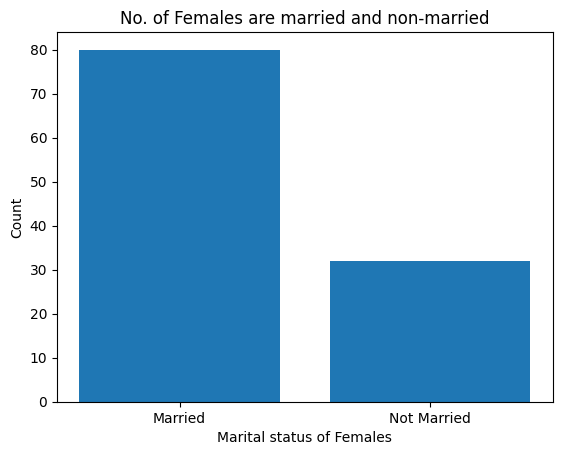

In [190]:
plt.bar(('Married','Not Married'),df[df['Gender']=='Female']['Married'].value_counts())
plt.title('No. of Females are married and non-married')
plt.xlabel('Marital status of Females')
plt.ylabel('Count')
plt.show()

4. How many Males and Females are graduated and non-graduated with respect to their Marital status?

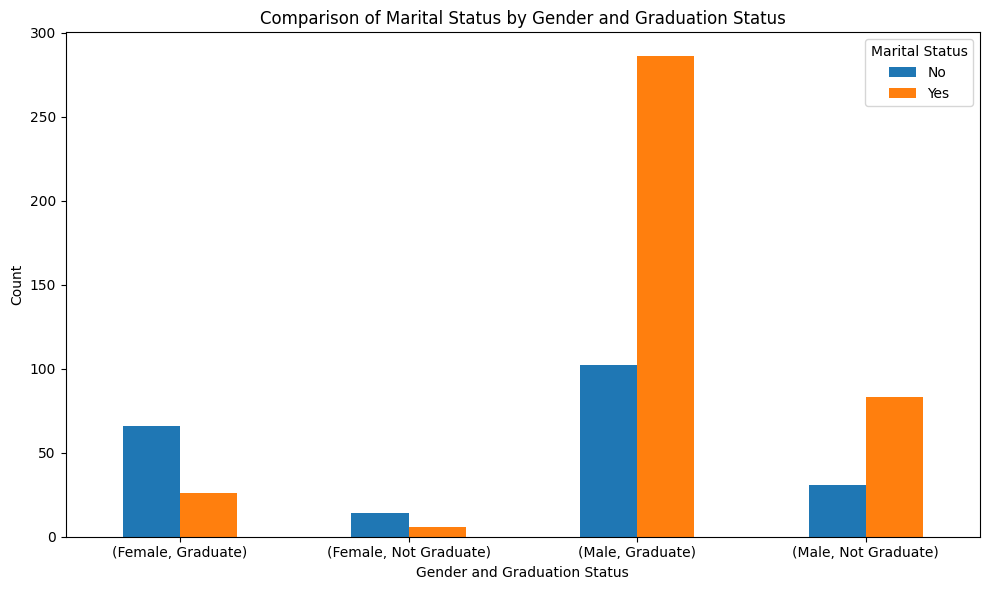

In [191]:
grouped = df.groupby(['Gender', 'Education', 'Married']).size().reset_index(name='Count')
pivot_data = grouped.pivot_table(index=['Gender', 'Education'], columns='Married', values='Count', fill_value=0)
ax = pivot_data.plot(kind='bar', rot=0, figsize=(10, 6))
plt.title('Comparison of Marital Status by Gender and Graduation Status')
plt.xlabel('Gender and Graduation Status')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()

5. Which type of encoding will be required to perform on the "Education" column?

  -> In this case, since the 'Education' column contains two categories,
'graduate' or 'not graduate,' label encoding can be applied.



6. Is it a male or a female whose loan amount is the highest?

In [192]:
df[df['LoanAmount']== df['LoanAmount'].max()]['Gender']

171    Male
Name: Gender, dtype: object

7. the specification and information about the applicant who has the highest income?

In [193]:
df[df['Total_Income']==df['Total_Income'].max()]

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
409,Male,Yes,3+,Graduate,No,360.0,360.0,0.0,Rural,N,81000.0


**Peforming** Label Encoding on Data

In [194]:
le = LabelEncoder()

In [195]:
# MALE->1 AND FEMALE->0
df.Gender = le.fit_transform(df.Gender)
test_data.Gender = le.fit_transform(test_data.Gender)

In [196]:
# Yes -> 1,No -> 0
df.Married = le.fit_transform(df.Married)
test_data.Married = le.fit_transform(test_data.Married)

In [197]:
# 0 -> 0,1 -> 1,2 -> 2,3+ -> 3
df.Dependents = le.fit_transform(df.Dependents)
test_data.Dependents = le.fit_transform(test_data.Dependents)

In [198]:
# Graduate -> 0 , Not Graduate -> 1
df.Education = le.fit_transform(df.Education)
test_data.Education = le.fit_transform(test_data.Education)

In [199]:
# No -> 0 , Yes -> 1
df.Self_Employed = le.fit_transform(df.Self_Employed)
test_data.Self_Employed = le.fit_transform(test_data.Self_Employed)

In [200]:
#Semiurban -> 1 ,Urban -> 2 ,Rural-> 0
df.Property_Area = le.fit_transform(df.Property_Area)
test_data.Property_Area = le.fit_transform(test_data.Property_Area)

In [201]:
#Yes -> 1 , No -> 0
df.Loan_Status = le.fit_transform(df.Loan_Status)

8. What all features are you going to consider for the model training and why? (Give the appropriate reason for
choosing such features among others)

--> We will use all the features except *Loan_ID*  because it doesn't affect the ouput of the following model and *Self_Employed* because it doesn't provide proper relationship with the Loan_Status

<Axes: >

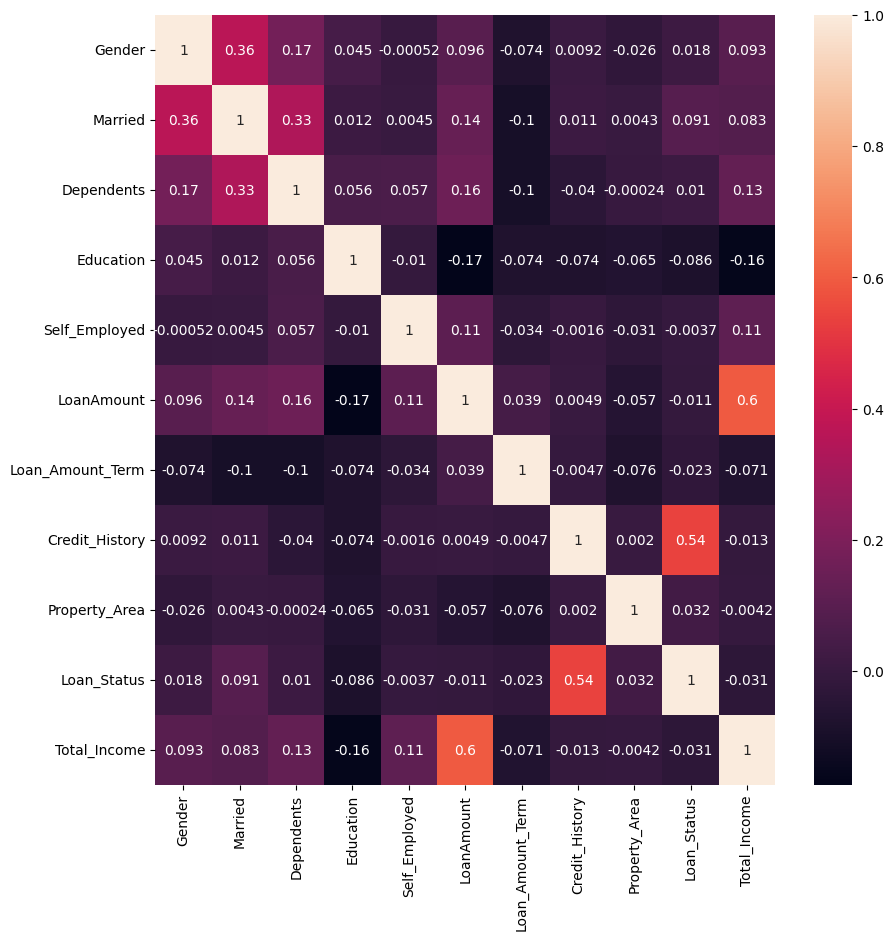

In [202]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True)

# **Training Model**

In [203]:
X = df.drop(['Loan_Status','Self_Employed'],axis=1)


In [204]:
test_data = test_data.drop(['Loan_ID','Self_Employed'],axis=1)

In [205]:
y = df.Loan_Status

In [206]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [207]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [208]:
lr.fit(X_train,y_train)
dtc.fit(X_train,y_train)
rfc.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [209]:
y_pred_lr = lr.predict(X_test)
y_pred_dtc = dtc.predict(X_test)
y_pred_rfc = rfc.predict(X_test)

In [210]:
print(accuracy_score(y_test,y_pred_lr))
print(accuracy_score(y_test,y_pred_dtc))
print(accuracy_score(y_test,y_pred_rfc))

0.8617886178861789
0.6910569105691057
0.8292682926829268


9. Which model are you going to choose and define the reason for going with the same model?
--> We will use Logistic Regressor as it gives us more accuracy then decision tree and random forest classifier

10. Have you performed the Hyper Parameter Tuning?
--> No

11. Compare the Actual results with the Predicted results

In [211]:
final_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred_lr

})

In [212]:
final_df

,Actual Value,Predicted Value
455,1,1
132,1,1
244,1,1
53,0,1
264,1,1
...,...,...
544,1,1
129,0,1
360,0,1
446,1,1


12. What's the accuracy of your model?

In [213]:
r2_score(y_test, y_pred_lr)

0.21390977443609005

In [214]:
accuracy_score(y_test, y_pred_lr)

0.8617886178861789

In [215]:
pipeline = Pipeline([
    ('logreg', lr)
])
pipeline.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('logreg', LogisticRegression())])

In [217]:
y_pred = pipeline.predict(test_data)

In [218]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [219]:
len(y_pred)

367

In [220]:
len(test_data)

367

In [221]:
test_data['Result']= [i for i in y_pred]

In [222]:
test_data.head(10)

,Gender,Married,Dependents,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Result
0,1,1,0,0,110.0,360.0,1.0,2,5720,1
1,1,1,1,0,126.0,360.0,1.0,2,4576,1
2,1,1,2,0,208.0,360.0,1.0,2,6800,1
3,1,1,2,0,100.0,360.0,1.0,2,4886,1
4,1,0,0,1,78.0,360.0,1.0,2,3276,1
5,1,1,0,1,152.0,360.0,1.0,2,5587,1
6,0,0,1,1,59.0,360.0,1.0,1,2226,1
7,1,1,2,1,147.0,360.0,0.0,0,3881,0
8,1,1,2,0,280.0,240.0,1.0,2,13633,1
9,1,0,0,1,123.0,360.0,1.0,1,4800,1


# Pickle File

In [224]:
import pickle
pickle.dump(pipeline, open('Loan_Status_Prediction.pkl', 'wb'))

**13. In order to improve the accuracy, what more approaches can be done?**

 --> In order to improve the accuracy of the model we can perform hyper parameter Tuning and also experimenting with data in different ways using Feature Engineering.

# **Conclusion :**
The dataset contains more male applicants than female applicants.
Credit history plays a significant role in loan approval, with a majority of applicants having a credit history of 1 (indicating good credit). The majority of applicants are graduates, while a smaller portion are not graduates.
The 'Total_Income' feature, calculated by summing 'ApplicantIncome' and 'CoapplicantIncome', provides insight into the combined income of applicants.
